In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
import pydot 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import gc, os


D:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_csv('data_merged.csv')
data.dropna(axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2847427 entries, 0 to 3381225
Data columns (total 22 columns):
Unnamed: 0             int64
trip_id                int64
start_time             object
end_time               object
bikeid                 int64
tripduration           int64
from_station_id        int64
from_station_name      object
to_station_id          int64
to_station_name        object
usertype               object
gender                 object
month                  int64
date                   object
hour                   int64
day                    int64
dayofweek              int64
weekend                int64
age                    float64
DailySnowDepth         float64
HourlyTemperature      float64
HourlyPrecipitation    float64
dtypes: float64(4), int64(11), object(7)
memory usage: 499.7+ MB


In [3]:
#Statistics of Relevant Columns
data[['age','tripduration','HourlyTemperature','hour','HourlyPrecipitation']].describe()

,age,tripduration,HourlyTemperature,hour,HourlyPrecipitation
count,2.847427e+06,2.847427e+06,2.847427e+06,2.847427e+06,2.847427e+06
mean,3.526130e+01,8.342428e+02,6.356869e+01,1.357348e+01,8.371524e-03
std,1.082504e+01,1.567893e+03,1.895878e+01,4.819097e+00,7.829714e-02
min,0.000000e+00,1.700000e+01,-9.000000e+00,0.000000e+00,0.000000e+00
25%,2.700000e+01,3.640000e+02,4.800000e+01,9.000000e+00,0.000000e+00
50%,3.200000e+01,5.930000e+02,6.900000e+01,1.500000e+01,0.000000e+00
75%,4.100000e+01,9.870000e+02,7.800000e+01,1.700000e+01,0.000000e+00
max,7.900000e+01,8.632500e+04,9.700000e+01,2.300000e+01,1.910000e+00


In [4]:
#Frequency of Station Uses (Descending)
data['AllStation']=data['to_station_name']
data['AllStation'].append(data['from_station_name'])
maxStation=data['AllStation'].max()
data['AllStation'].value_counts()

Canal St & Adams St                    53012
Clinton St & Madison St                44887
Clinton St & Washington Blvd           43038
Daley Center Plaza                     30973
Kingsbury St & Kinzie St               30904
Michigan Ave & Washington St           29507
Canal St & Madison St                  27279
Franklin St & Monroe St                25011
Streeter Dr & Grand Ave                23782
LaSalle St & Jackson Blvd              23136
Clinton St & Lake St                   21357
Clark St & Elm St                      20557
Lake Shore Dr & North Blvd             20460
Dearborn St & Erie St                  20298
Larrabee St & Kingsbury St             20046
Orleans St & Merchandise Mart Plaza    19823
Theater on the Lake                    19620
St. Clair St & Erie St                 19506
Wabash Ave & Roosevelt Rd              18796
Wells St & Concord Ln                  18274
Columbus Dr & Randolph St              17797
Dearborn St & Monroe St                17069
LaSalle St

In [5]:
data['date']=pd.to_datetime(data.date)

In [6]:
data['DayofWeek']=data.date.dt.dayofweek

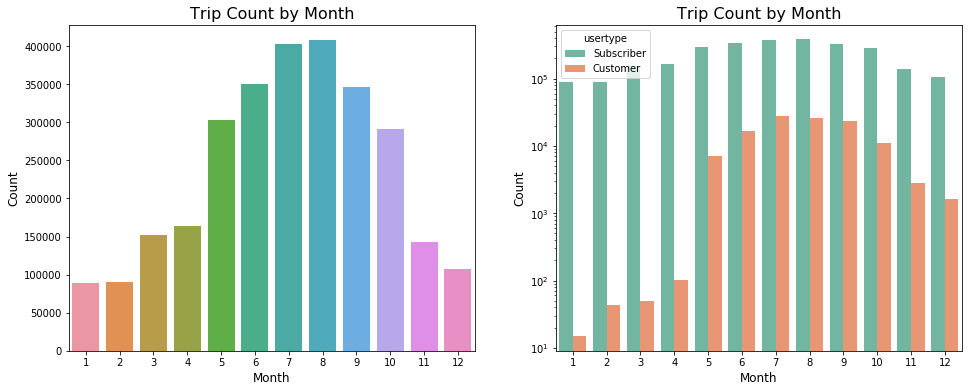

In [7]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='month', data=data,ax=ax[0])
ax[0].set_title('Trip Count by Month', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.countplot(x='month', data=data,ax=ax[1],hue='usertype',palette='Set2')
ax[1].set_title('Trip Count by Month', fontsize=16)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].set_yscale('log')

plt.show()

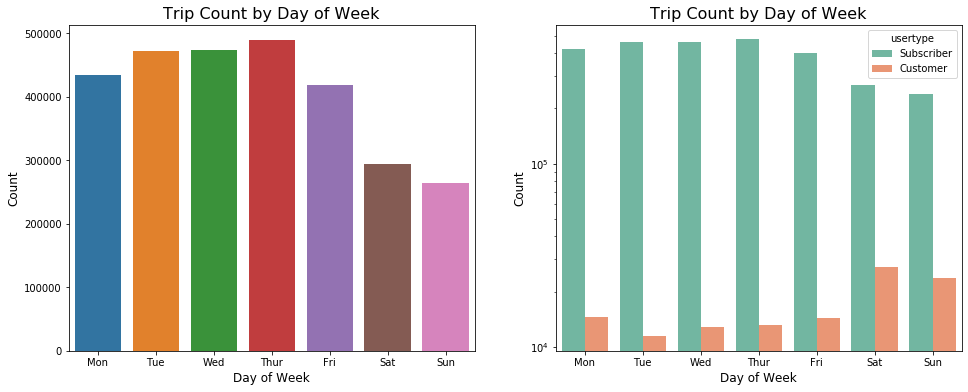

In [8]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='DayofWeek', data=data,ax=ax[0])
ax[0].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
ax[0].set_title('Trip Count by Day of Week', fontsize=16)
ax[0].set_xlabel('Day of Week', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.countplot(x='DayofWeek', data=data,hue='usertype',ax=ax[1],palette='Set2')
ax[1].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
ax[1].set_title('Trip Count by Day of Week', fontsize=16)
ax[1].set_xlabel('Day of Week', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].set_yscale('log')


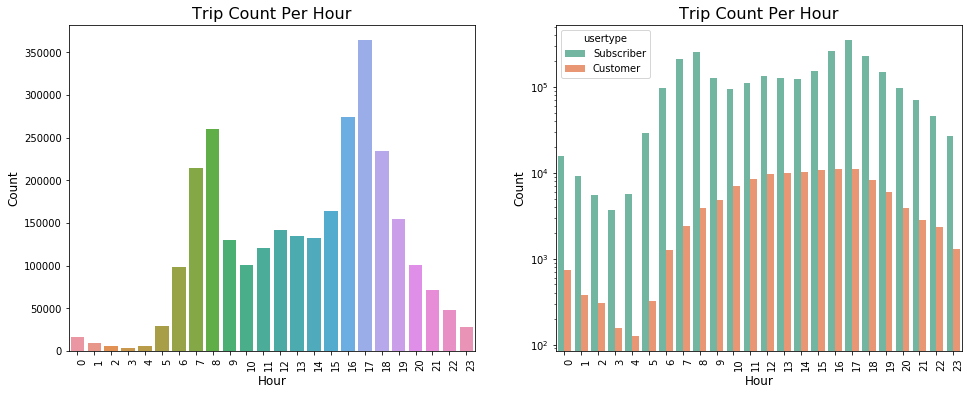

In [9]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='hour', data=data,ax=ax[0])
ax[0].set_title('Trip Count Per Hour', fontsize=16)
ax[0].set_xlabel('Hour', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha="left")
sns.countplot(x='hour', data=data,ax=ax[1],hue='usertype',palette='Set2')
ax[1].set_title('Trip Count Per Hour', fontsize=16)
ax[1].set_xlabel('Hour', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha="left")
ax[1].set_yscale('log')
plt.show()

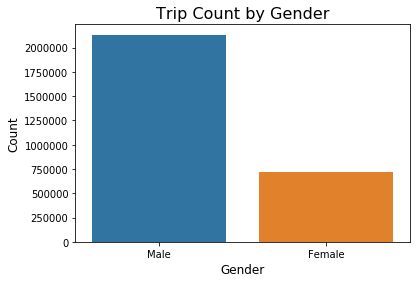

In [10]:
# Trip distribution
ax=sns.countplot(x='gender', data=data)
ax.set_title('Trip Count by Gender', fontsize=16)
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

Text(0, 0.5, 'Count')

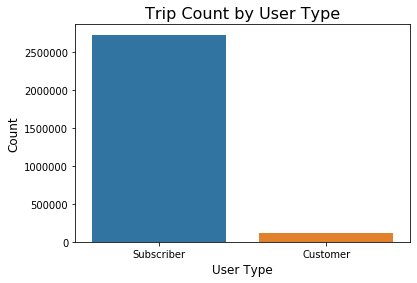

In [11]:
# Trip distribution
# Subscriber: Annual Membership
# Cumtomer: 24-hour pass
ax=sns.countplot(x='usertype', data=data)
ax.set_title('Trip Count by User Type', fontsize=16)
ax.set_xlabel('User Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

(array([ 527035.,   23024., 1056697.,  996760.,  399079.,  274046.,
          96501.,    8084.]),
 array([ 0.   ,  9.875, 19.75 , 29.625, 39.5  , 49.375, 59.25 , 69.125,
        79.   ]),
 <a list of 8 Patch objects>)

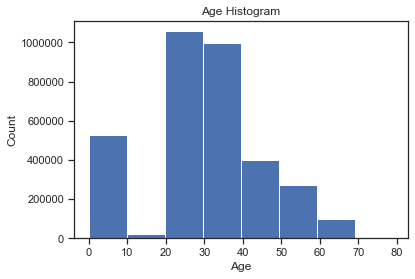

In [12]:
# Plot histogram
sns.set(style = "ticks") # try different styles: 'whitegrid', 'darkgrid', 'white', 'whitegrid'
heights = pd.read_csv('data_merged.csv')
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.hist(heights['age'], bins = 8)

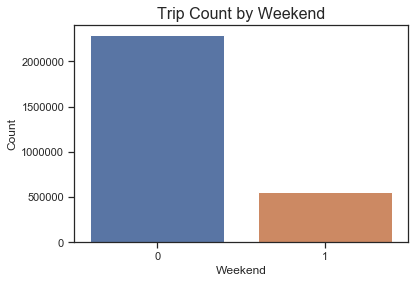

In [13]:
# Trip distribution
ax=sns.countplot(x='weekend', data=data)
ax.set_title('Trip Count by Weekend', fontsize=16)
ax.set_xlabel('Weekend', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

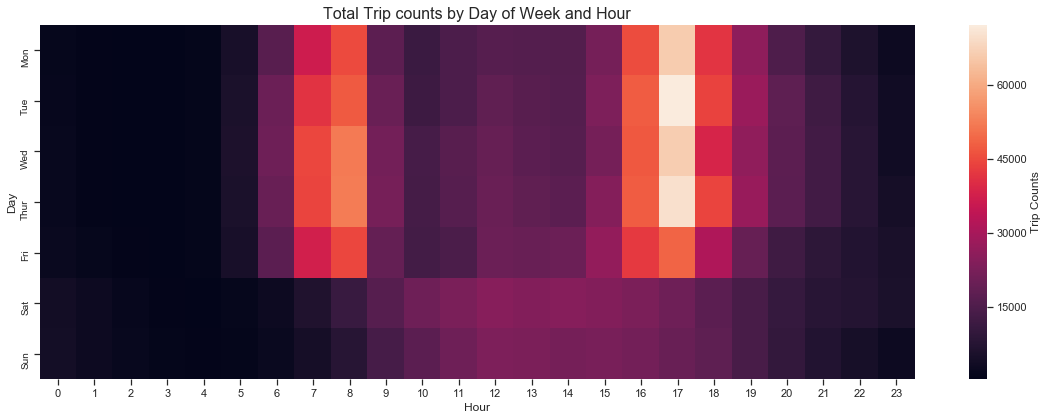

In [14]:
# heatmap of trip count vs. (day and hour)
fig, ax = plt.subplots(figsize=(16, 6))
tmp = data[['DayofWeek', 'hour', 'tripduration']].groupby(['DayofWeek', 'hour']).count().reset_index()
pivots = tmp.pivot('DayofWeek', 'hour', 'tripduration')
sns.heatmap(pivots, cbar_kws={'label': 'Trip Counts'})
ax.set_title('Total Trip counts by Day of Week and Hour', fontsize=16)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Day', fontsize=12)
ax.set_yticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), fontsize=10)
plt.tight_layout()
plt.show()